In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

import requests

In [40]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 2.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [42]:
import kaleido

In [37]:
import plotly.io as pio

pio.renderers
pio.renderers.default = "png"

In [38]:
from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:85% !important; }</style>"))
display(HTML("<style>.prompt { min-width:10ex !important; }</style>"))
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [3]:
url = 'https://lodmedia.hb.bizmrg.com/case_files/1059645/train_dataset_hackaton2023_train.gzip'
response = requests.get(url)

# убедитесь, что запрос закончился успешно:
if response.status_code == 200:
    with open('train_dataset', 'wb') as file:
        file.write(response.content)
else:
    print('Ошибка при загрузке файла')



In [4]:
df = pd.read_parquet('train_dataset')

In [ ]:
df.head()

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name
0,29891,9.0,1,train,69.99,2022-12-05 12:03:58,Кинг Фри станд,300.0,Отдельно стоящий без внешней зоны
1,29891,9.0,1,train,190.00,2022-12-05 12:03:58,Чикен Тар-Тар,300.0,Отдельно стоящий без внешней зоны
2,29891,9.0,1,train,9.99,2022-12-05 12:03:58,Соус Сырный,300.0,Отдельно стоящий без внешней зоны
3,29891,9.0,1,train,119.99,2022-12-05 12:03:58,Энергет.нап. Адреналин Раш,300.0,Отдельно стоящий без внешней зоны
4,29891,9.0,1,train,119.99,2022-12-05 14:28:35,Латте (СТАНД.),300.0,Отдельно стоящий без внешней зоны


# 4. Посмотреть как пользователь покупает с акциями или без в рамках 1 и 0

Акция - когда цена одного товара в чеке меньше какой-то средней/медианы/etc по этому товару. Для этого надо вытащить стоимость одного товара из позиции в чеке, а у нас есть только общий revenue и нет количества товара. Клиент мог покупать по акции много товаров, поэтому собственно из revenue, кажется, много не получить

Возможно, на акцию указывает название позиции в чеке?

In [16]:
print(df.dish_name.drop_duplicates().sort_values().to_string())

1253                                  1RUB.АНГУС Шеф new
8049159                                1RUB.Ангус 4 Сыра
661                1RUB.Вода Аква Минерале без газа 0,5л
182308              1RUB.Вода Аква Минерале с газом 0,5л
1478                                         1RUB.Воппер
335199                                    1RUB.Гамбургер
371864                                    1RUB.Гранд Чиз
662                                  1RUB.Гранд Чиз Фреш
311367                            1RUB.Двойной Чизбургер
4176                         1RUB.Дюшес б/л стандарт 0,5
458904                           1RUB.Дюшес стандарт 0,5
659                                 1RUB.Капучино (БОЛ.)
1263                            1RUB.Карт. Деревен. джун
1257                             1RUB.Карт. Деревен. мал
1479                                   1RUB.Кинг Фри мал
606                                  1RUB.Кинг Фри станд
11867                         1RUB.Кола б/л стандарт 0,5
5298238                        

In [12]:
df[(df['dish_name'] == '1RUB.АНГУС Шеф new') & (df['revenue'] != 1.)].head()

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name
1262,47107,14.0,1,train,0.33,2022-12-13 18:18:16,1RUB.АНГУС Шеф new,112.5,Фудкорт с туалетом
1481,68632,1.0,1,train,0.33,2022-12-07 13:55:59,1RUB.АНГУС Шеф new,128.4,Фудкорт без туалета
82181,242432,32.0,1,train,150.99,2023-03-07 18:07:22,1RUB.АНГУС Шеф new,280.0,Отдельно стоящий с внешней зоной
93298,247677,21.0,1,train,0.34,2022-12-11 13:57:07,1RUB.АНГУС Шеф new,71.7,Фудкорт без туалета
113131,256784,12.0,1,train,2.00,2023-01-06 13:51:30,1RUB.АНГУС Шеф new,101.7,Фудкорт без туалета


In [14]:
df[(df['dish_name'].str.contains('1RUB')) & (df['revenue'] != 1.)].head()

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name
1259,47107,14.0,1,train,0.34,2022-12-13 18:18:16,"1RUB.Липтон Лимон в бутылке 0,5л",112.5,Фудкорт с туалетом
1262,47107,14.0,1,train,0.33,2022-12-13 18:18:16,1RUB.АНГУС Шеф new,112.5,Фудкорт с туалетом
1263,47107,14.0,1,train,0.33,2022-12-13 18:18:16,1RUB.Карт. Деревен. джун,112.5,Фудкорт с туалетом
1478,68632,1.0,1,train,30.99,2022-12-06 13:13:20,1RUB.Воппер,206.0,Отдельно стоящий
1479,68632,1.0,1,train,0.33,2022-12-07 13:55:59,1RUB.Кинг Фри мал,128.4,Фудкорт без туалета


Даже если в названии товара указано 1RUB, всё равно клиент мог заплатить больше

In [18]:
df[(df['dish_name'].str.contains('Up'))].head()

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name
9,29891,9.0,1,train,84.99,2022-12-21 13:12:09,Flash Up,463.0,Отдельно стоящий с внешней зоной
10,29891,9.0,1,train,229.96,2022-12-22 09:21:57,Up Цезарь ролл со стрипсами,463.0,Отдельно стоящий с внешней зоной
11,29891,9.0,1,train,229.96,2022-12-23 09:25:07,Up Цезарь ролл со стрипсами,463.0,Отдельно стоящий с внешней зоной
23,29891,9.0,1,train,84.99,2022-12-31 16:15:26,Flash Up,463.0,Отдельно стоящий с внешней зоной
28,29891,9.0,1,train,84.99,2023-01-14 01:13:47,Flash Up,463.0,Отдельно стоящий с внешней зоной


Указывает ли Up в названии на акцию?

In [21]:
print(df.groupby('dish_name')['revenue'].mean().sort_values().to_string())

dish_name
1RUB.Двойной Чизбургер                             0.333235
1RUB.Кинг Фри мал                                  0.336077
1RUB.Чипсы Lay’s сметана и зелень                  0.337500
1RUB.Карт. Деревен. джун                           0.339134
Пепси Черри в бутылке 0,5л                         0.635000
Сбер.Пирожок с вишней                              0.700000
1RUB.Эвервесс Апельсин в бутылке 0,5л              0.946520
1RUB.Эвервесс Блэк Роял в бутылке 0,5л             0.951965
1RUB.Липтон Лимон в бутылке 0,5л                   0.970398
1RUB.Эвервесс Лемон-Лайм в бутылке 0,5л            0.971372
1RUB.Липтон Зеленый Чай в бутылке 0,5л             0.979100
Сбер.Латте (СТАНД.) за 1руб                        1.000000
1RUB.Ангус 4 Сыра                                  1.000000
Т3.1RUB.АНГУС Шеф new                              1.000000
1RUB.Миринда в бутылке 0,5л                        1.000000
1RUB.Мандарин стандарт 0,5                         1.000000
1RUB.Дюшес стандарт 0,5       

In [22]:
print(df.groupby('dish_name')['buy_post'].mean().sort_values().to_string())

dish_name
Up Эвервесс Блэк Роял XL 1л                     0.000000
Севен Ап стандарт 0,5                           0.000000
Up Креветки (6 шт.)                             0.000000
Пепси Макс  мал 0,4                             0.000000
Пепси Макс XL 1л                                0.000000
Up Кола б/л XL 1л                               0.000000
Воппер Джуниор Сыр-Бекон new                    0.000000
Up МИКС МАСТЕР «Перчик Чили» Деревенский L      0.000000
Миринда XL 1л                                   0.000000
Острый Чеддер Начос Кинг Двойной                0.000000
Кола XL 1л                                      0.000000
Пепси Манго стандарт 0,5                        0.125000
Пепси Манго большой 0,8                         0.250000
Мандарин большой 0,8                            0.272727
Капучино (СТАНД.) с сиропом                     0.333333
Мандарин XL 1л                                  0.333333
Клубничный Шейк 0,5                             0.333333
Эвервесс Блэк Роял XL

In [23]:
df.groupby('dish_name')['buy_post'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

,mean,count
dish_name,,
"Up Шоколадный Шейк 0,3",1.0,1
Up Острый Ангус Пармеджано Двойной,1.0,3
"Up Пепси Макс мал 0,4",1.0,1
Up Ролл Индейка Пармезан,1.0,28
Up Соус Барбекю,1.0,8
...,...,...
Кола XL 1л,0.0,2
Пепси Макс XL 1л,0.0,1
"Пепси Макс мал 0,4",0.0,1


<Axes: xlabel='dish_name'>

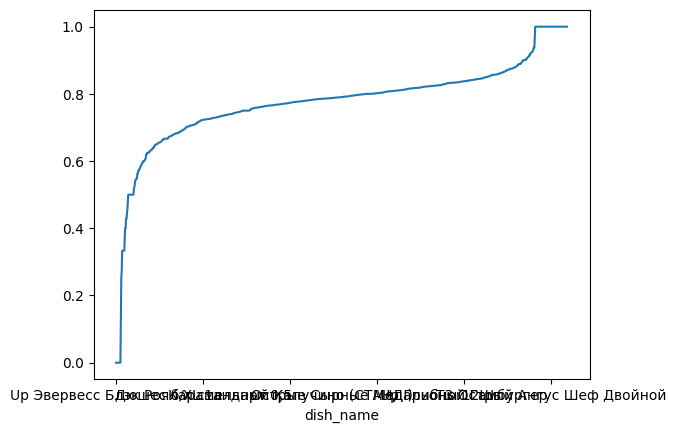

In [24]:
df.groupby('dish_name')['buy_post'].mean().sort_values().plot()

In [ ]:
df.groupby('dish_name')['buy_post'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

In [71]:
df['dish_name_contains_up'] = np.where(df['dish_name'].str.contains('Up'), 1, 0)

In [69]:
ids_cols = ['customer_id', 'buy_post', 'startdatetime']

In [72]:
df_agg_dishname_up = df.groupby(ids_cols, as_index=True).agg({"dish_name_contains_up": ["mean"]})
df_agg_dishname_up.columns = ["dish_name_contains_up_mean"]
df_agg_dishname_up.reset_index(inplace=True)

In [ ]:
df

In [73]:
df_agg_dishname_up.groupby(['buy_post']).agg()

In [78]:
# import plotly.io as pio
# import plotly.express as px

# pio.renderers
# pio.renderers.default = "png"

fig = px.histogram(
    df,
    x="dish_name_contains_up",
    color="buy_post",
    barmode='overlay',
    marginal="box",
    width=1000,
    height=800,
    title="Похожесть чека",
)

fig.show()

In [45]:
df_agg_dishname_up

,customer_id,buy_post,startdatetime,dish_name_contains_up_mean
0,29891,1,2022-12-05 12:03:58,0.000000
1,29891,1,2022-12-05 14:28:35,0.000000
2,29891,1,2022-12-15 00:37:19,0.000000
3,29891,1,2022-12-20 09:20:38,0.000000
4,29891,1,2022-12-21 09:46:23,0.000000
...,...,...,...,...
2880581,46654016,1,2023-08-01 14:04:28,0.000000
2880582,46654016,1,2023-08-01 18:15:31,0.000000
2880583,46661804,0,2023-08-01 17:50:26,0.000000
2880584,46661804,0,2023-08-01 18:01:40,0.000000


In [61]:
tmp = df.groupby("dish_name_contains_up", as_index=False).agg({"buy_post": ["sum", "count"]})
tmp["buy_post (%)"] = 100 * tmp["buy_post", "sum"] / tmp["buy_post", "count"]
tmp.sort_values("buy_post (%)").reset_index(drop=True)

dish_name_contains_up buy_post           buy_post (%)
                             sum     count             
0                     0  8705073  10960342    79.423370
1                     1   955794   1169042    81.758739

мб схлопнуть по товарам

In [58]:
df_item_agg = df.groupby(['dish_name'], as_index=True).agg({'buy_post': ['mean', 'count']})

In [59]:
df_item_agg

buy_post       
                                          mean  count
dish_name                                            
1RUB.АНГУС Шеф new                    0.872375   3095
1RUB.Ангус 4 Сыра                     1.000000      1
1RUB.Вода Аква Минерале без газа 0,5л 0.878049    205
1RUB.Вода Аква Минерале с газом 0,5л  0.834395    157
1RUB.Воппер                           0.816247  10525
...                                        ...    ...
Эвервесс Лемон-Лайм мал 0,4           0.696793    343
Эвервесс Лемон-Лайм стандарт 0,5      0.731250    320
Энергет.нап. Адреналин Раш            0.770579   3195
Энергет.нап. Адреналин Раш 0,25л      0.803030     66
Энергет.нап. Адреналин Раш 0,449л     0.875000      8

[1038 rows x 2 columns]

# 9. Привычки покупок, отличается ли его корзина от предыдущего похода

In [15]:
pd.get_dummies(np.array([1, 2, 2, 3]))

,1,2,3
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1


Привычка - это когда у клиента похожая корзина по сабсету

Похожесть корзин



схлопнуть до чека и перевести покупку в np array

In [17]:
df['item_id'], _ = pd.factorize(df['dish_name'])

In [19]:
df.tail()

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name,item_id
24261974,46661804,NaN,0,train,7.99,2023-08-01 18:04:56,"Эвервесс Кола джун 0,3л",300.0,Фудкорт с туалетом,56
24261975,46661804,NaN,0,train,84.98,2023-08-01 18:04:56,Воппер Джуниор,300.0,Фудкорт с туалетом,67
24261976,46661804,NaN,0,train,70.03,2023-08-01 18:04:56,Наггетсы (3 шт.),300.0,Фудкорт с туалетом,66
24261977,46661804,NaN,0,train,19.00,2023-08-01 18:04:56,Сырные Медальоны (3 шт.),300.0,Фудкорт с туалетом,30
24261978,46661804,NaN,0,train,17.99,2023-08-01 18:04:56,Кинг Фри мал,300.0,Фудкорт с туалетом,29


In [22]:
df_checks = df.groupby(['customer_id', 'startdatetime', 'buy_post']).item_id.apply(np.array)

In [23]:
df_checks.head()

customer_id  startdatetime        buy_post
29891        2022-12-05 12:03:58  1           [0, 1, 2, 3]
             2022-12-05 14:28:35  1                    [4]
             2022-12-15 00:37:19  1                 [5, 6]
             2022-12-20 09:20:38  1                    [7]
             2022-12-21 09:46:23  1                    [8]
Name: item_id, dtype: object

In [24]:
df_checks.reset_index()

,customer_id,startdatetime,buy_post,item_id
0,29891,2022-12-05 12:03:58,1,"[0, 1, 2, 3]"
1,29891,2022-12-05 14:28:35,1,[4]
2,29891,2022-12-15 00:37:19,1,"[5, 6]"
3,29891,2022-12-20 09:20:38,1,[7]
4,29891,2022-12-21 09:46:23,1,[8]
...,...,...,...,...
2880581,46654016,2023-08-01 14:04:28,1,[405]
2880582,46654016,2023-08-01 18:15:31,1,"[125, 340]"
2880583,46661804,2023-08-01 17:50:26,0,"[18, 0, 364]"
2880584,46661804,2023-08-01 18:01:40,0,"[29, 5, 301, 66, 121, 30]"


In [31]:
df_grouped_customers = df.groupby(['customer_id'])

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

заванхотить все товары нельзя, у колаба для этого не хватает ОЗУ

In [33]:
similarity_scores = []

for name, group in df_grouped_customers:
  group_onehot = pd.get_dummies(group['item_id'])
  if group_onehot.shape[0] > 1:
    # Вычисление матрицы сходства
    similarity_matrix = cosine_similarity(group_onehot)
    # Вычисление среднего значения схожести для данного покупателя
    similarity_score = np.mean(similarity_matrix)

    # Добавление вектора в список
    similarity_scores.append(similarity_score)
  else:
    similarity_scores.append(0)


    # Создание Dataframe с показателями схожести
similarity_df = pd.DataFrame(list(zip(df_grouped_customers.groups.keys(), similarity_scores)), columns=['customer_id', 'Cosine Similarity'])

<ipython-input-33-b89be5d8fa58>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in df_grouped_customers:


In [34]:
similarity_df

,customer_id,Cosine Similarity
0,29891,0.044983
1,30477,0.069067
2,31426,0.109519
3,44491,0.320000
4,44939,0.075200
...,...,...
499995,46624509,0.140496
499996,46625265,0.207101
499997,46639170,0.355372
499998,46654016,0.166667


In [38]:
similarity_df[similarity_df['Cosine Similarity'] < 1.].sort_values(by='Cosine Similarity')

,customer_id,Cosine Similarity
345001,26625792,0.014879
210950,18826129,0.016105
114899,9810827,0.016461
270944,22698349,0.016686
492452,43302178,0.016756
...,...,...
324034,25445477,0.941230
250495,21752895,0.941230
49912,4003935,0.947407
22999,1276228,0.950033


In [ ]:
df_similarity_threshold = similarity_df[similarity_df['Cosine Similarity'] < 1.]

In [48]:
df_customer_buy_post = df.groupby('customer_id').agg({'buy_post': ['min', 'count']}).reset_index()

In [54]:
df_customer_buy_post.head()

customer_id buy_post      
                   min count
0       29891        1    34
1       30477        1    61
2       31426        1    86
3       44491        1    10
4       44939        1    25

In [57]:
df_customer_cosine_sim_count = pd.merge(similarity_df, df_customer_buy_post, on='customer_id')

<ipython-input-57-69da7ddb3a2e>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df_customer_cosine_sim_count = pd.merge(similarity_df, df_customer_buy_post, on='customer_id')
<ipython-input-57-69da7ddb3a2e>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_customer_cosine_sim_count = pd.merge(similarity_df, df_customer_buy_post, on='customer_id')


In [58]:
df_customer_cosine_sim_count.head()

,customer_id,Cosine Similarity,"(buy_post, min)","(buy_post, count)"
0,29891,0.044983,1,34
1,30477,0.069067,1,61
2,31426,0.109519,1,86
3,44491,0.320000,1,10
4,44939,0.075200,1,25


In [59]:
df_customer_cosine_sim_count.columns = ['customer_id', 'cosine_similarity', 'buy_post', 'count\']

In [60]:
df_customer_cosine_sim_count.head()

,customer_id,cosine_similarity,buy_post,count
0,29891,0.044983,1,34
1,30477,0.069067,1,61
2,31426,0.109519,1,86
3,44491,0.320000,1,10
4,44939,0.075200,1,25


In [64]:
df_customer_cosine_sim_count[df_customer_cosine_sim_count['count'] > 1]

,customer_id,cosine_similarity,buy_post,count
0,29891,0.044983,1,34
1,30477,0.069067,1,61
2,31426,0.109519,1,86
3,44491,0.320000,1,10
4,44939,0.075200,1,25
...,...,...,...,...
499995,46624509,0.140496,0,11
499996,46625265,0.207101,0,13
499997,46639170,0.355372,1,11
499998,46654016,0.166667,1,6


In [75]:
fig = px.histogram(
    df_customer_cosine_sim_count,
    x="cosine_similarity",
    color="buy_post",
    barmode='overlay',
    marginal="box",
    width=1000,
    height=800,
    title="Похожесть чека",
)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [82]:
df_checks

customer_id  startdatetime        buy_post
29891        2022-12-05 12:03:58  1                        [0, 1, 2, 3]
             2022-12-05 14:28:35  1                                 [4]
             2022-12-15 00:37:19  1                              [5, 6]
             2022-12-20 09:20:38  1                                 [7]
             2022-12-21 09:46:23  1                                 [8]
                                                        ...            
46654016     2023-08-01 14:04:28  1                               [405]
             2023-08-01 18:15:31  1                          [125, 340]
46661804     2023-08-01 17:50:26  0                        [18, 0, 364]
             2023-08-01 18:01:40  0           [29, 5, 301, 66, 121, 30]
             2023-08-01 18:04:56  0           [301, 56, 67, 66, 30, 29]
Name: item_id, Length: 2880586, dtype: object

In [84]:
df_checks.reset_index().groupby(['customer_id'])

In [61]:
def calculate_information_value(dataset, feats, target_col):
    iv_by_feat = {}
    temp = dataset.copy()
    for feat in feats:
        temp["quant_range"] = pd.qcut(
            x=temp[feat], q=[0, 0.25, 0.5, 0.75, 1.0], duplicates="drop"
        )

        bins = {}
        for i, bin in enumerate(temp["quant_range"].unique()):
            bins[bin] = i

        temp["bin"] = temp["quant_range"].apply(lambda x: bins[x])

        iv = (
            pd.crosstab(temp["bin"], temp[target_col], normalize="columns")
            .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
            .assign(iv=lambda dfx: np.sum(dfx["woe"] * (dfx[1] - dfx[0])))
        )["iv"].unique()[0]

        iv_by_feat[feat] = [iv]
    df = pd.DataFrame(iv_by_feat).T
    df.reset_index(inplace=True)
    df.columns = ["feature", "IV"]
    return df


In [97]:
calculate_information_value(df_customer_cosine_sim_count, ['cosine_similarity'], 'buy_post')

,feature,IV
0,cosine_similarity,0.047049


In [99]:
calculate_information_value(df_customer_cosine_sim__by_checks_count, ['cosine_similarity'], 'buy_post')


,feature,IV
0,cosine_similarity,0.047049


In [ ]:
similarity_df['buy_post'] =

In [43]:
df[df['customer_id'] == 25445477]

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name,item_id
16253367,25445477,2.0,1,train,104.98,2022-12-14 18:55:41,Up Латте (БОЛ.),249.60,Отдельно стоящий без внешней зоны,204
16253368,25445477,2.0,1,train,209.96,2022-12-15 12:17:42,Up Латте (БОЛ.),300.51,Фудкорт без туалета,204
16253369,25445477,2.0,1,train,104.98,2022-12-17 15:08:56,Up Латте (БОЛ.),300.51,Фудкорт без туалета,204
16253370,25445477,2.0,1,train,104.98,2022-12-18 12:13:55,Up Латте (БОЛ.),300.51,Фудкорт без туалета,204
16253371,25445477,2.0,1,train,104.98,2022-12-21 10:33:03,Up Латте (БОЛ.),300.51,Фудкорт без туалета,204
16253372,25445477,2.0,1,train,104.98,2022-12-22 11:53:48,Up Латте (БОЛ.),312.88,Отдельно стоящий,204
16253373,25445477,2.0,1,train,104.98,2022-12-23 15:50:29,Up Латте (БОЛ.),300.51,Фудкорт без туалета,204
16253374,25445477,2.0,1,train,104.98,2022-12-23 19:12:10,Up Латте (БОЛ.),300.51,Фудкорт без туалета,204
16253375,25445477,2.0,1,train,104.98,2022-12-24 19:39:09,Up Латте (БОЛ.),300.51,Фудкорт без туалета,204
16253376,25445477,2.0,1,train,104.98,2022-12-26 12:58:10,Up Латте (БОЛ.),300.51,Фудкорт без туалета,204


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# Группировка данных по покупателям
grouped = df.groupby(['customer_id'])

# Ваш вектор со значениями сходства
similarity_scores = []

# Изучение каждой группы отдельно
for name, group in grouped:

  # Трансформация данных группы в "one-hot" вид (подставьте правильные названия вместо 'Products)
  group_onehot = pd.get_dummies(group['Products'])

  # Если в чеке более одной позиции, считать сходство
  if group_onehot.shape[0] > 1:
    # Вычисление матрицы сходства
    similarity_matrix = cosine_similarity(group_onehot)

    # Вычисление среднего значения схожести для данного покупателя
    similarity_score = np.mean(similarity_matrix)

    # Добавление вектора в список
    similarity_scores.append(similarity_score)

# Создание Dataframe с показателями схожести
similarity_df = pd.DataFrame(list(zip(grouped.groups.keys(), similarity_scores)), columns=['Customer', 'Cosine Similarity'])

In [6]:
df.dish_name.drop_duplicates().count()

1038

In [ ]:
df_onehot

In [86]:
similarity_by_checks_scores = []
df_grouped_checks = df_checks.reset_index().groupby(['customer_id'])

for name, group in df_grouped_checks:
  group_onehot = pd.get_dummies(group['item_id'].apply(pd.Series).stack())
  if group_onehot.shape[0] > 1:
    # Вычисление матрицы сходства
    similarity_matrix = cosine_similarity(group_onehot)
    # Вычисление среднего значения схожести для данного покупателя
    similarity_score = np.mean(similarity_matrix)

    # Добавление вектора в список
    similarity_by_checks_scores.append(similarity_score)
  else:
    similarity_by_checks_scores.append(0)


    # Создание Dataframe с показателями схожести
df_sim_by_checks = pd.DataFrame(list(zip(df_grouped_checks.groups.keys(), similarity_by_checks_scores)), columns=['customer_id', 'cosine_similarity'])

<ipython-input-86-950bdcdee5a9>:4: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



In [96]:
df_sim_by_checks

,customer_id,cosine_similarity
0,29891,0.044983
1,30477,0.069067
2,31426,0.109519
3,44491,0.320000
4,44939,0.075200
...,...,...
499995,46624509,0.140496
499996,46625265,0.207101
499997,46639170,0.355372
499998,46654016,0.166667


In [91]:
df_customer_cosine_sim__by_checks_count = pd.merge(df_sim_by_checks, df_customer_buy_post, on='customer_id')

<ipython-input-91-fb389cbee207>:1: FutureWarning:

merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)

<ipython-input-91-fb389cbee207>:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [95]:
df_customer_cosine_sim__by_checks_count[df_customer_cosine_sim__by_checks_count['count'] == 1]

,customer_id,cosine_similarity,buy_post,count


In [93]:
df_customer_cosine_sim__by_checks_count.columns = ['customer_id', 'cosine_similarity', 'buy_post', 'count']

In [94]:
fig = px.histogram(
    df_customer_cosine_sim__by_checks_count,
    x="cosine_similarity",
    color="buy_post",
    barmode='overlay',
    marginal="box",
    width=1000,
    height=800,
    title="Похожесть чека",
)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

# 11. Посмотреть какие периоды у нас даны (месяц, 2 месяца) в среднем для покупателя и посмотреть как меняется покупки в первой половине периода со второй (средний чек, количество товаров, какие то акции)

In [100]:
df_check_sums = df.groupby(['customer_id', 'startdatetime', 'buy_post'], as_index=True).agg({"revenue": ["sum", "count"]})
df_check_sums.columns = ["revenue_sum", "items_count"]
df_check_sums.reset_index(inplace=True)

df_check_sums['datetime'] = pd.to_datetime(df_check_sums['startdatetime'])

def calculate_means(group):
    group = group.sort_values('datetime')
    middle_date_idx = group['datetime'].values.shape[0] // 2

    # разделение на 2 датафрейма
    first_half_df = group.iloc[:middle_date_idx]
    second_half_df = group.iloc[middle_date_idx:]

    # расчет средних значений
    return pd.Series({'first_half_mean': first_half_df['revenue_sum'].mean(),
                      'second_half_mean': second_half_df['revenue_sum'].mean()})

# группировка по customer_id и расчет средних значений
means = df_check_sums.groupby('customer_id').apply(calculate_means)

df_customers = df.groupby(['customer_id']).agg({'buy_post': ['mean', 'min', 'count']})
df_customers = df_customers.reset_index()
df_customers.columns = ['customer_id', 'buy_post_mean', 'buy_post', 'count']

means =means.reset_index()

df_customer_halves = pd.merge(means, df_customers, on='customer_id')
df_customer_halves['diff'] = df_customer_halves.second_half_mean - df_customer_halves.first_half_mean

In [101]:
fig = px.histogram(
    df_customer_halves,
    x="diff",
    color="buy_post",
    marginal="box",
    width=1000,
    height=800,
    title="Распределение разниц сумм чеков",
    barmode='overlay',
)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [102]:
df_customer_dates = df.groupby(['customer_id']).agg({'startdatetime': ['min', 'max'], 'buy_post': ['mean', 'min', 'count']}).reset_index()
df_customer_dates.columns = ['customer_id', 'min_date', 'max_date', 'buy_post_mean', 'buy_post_min', 'count']
df_customer_dates['datediff'] = df_customer_dates['max_date'] - df_customer_dates.min_date
df_customer_dates.datediff.mean()

Timedelta('33 days 12:49:31.396619999')

In [103]:
calculate_information_value(df_customer_halves, ['diff'], 'buy_post')

,feature,IV
0,diff,0.027565
